In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
age_demographics_df = pd.read_csv("datasets/case_demographics_age.csv")

In [5]:
age_demographics_df.head()

,age_group,totalpositive,date,case_percent,deaths,deaths_percent,ca_percent
0,0-17,120,2020-04-02,NaN,NaN,NaN,NaN
1,18-49,5302,2020-04-02,NaN,NaN,NaN,NaN
2,50-64,2879,2020-04-02,NaN,NaN,NaN,NaN
3,65 and Older,2342,2020-04-02,NaN,NaN,NaN,NaN
4,Unknown,58,2020-04-02,NaN,NaN,NaN,NaN


In [44]:
weather_df = pd.read_csv("south_korea_dataset/Weather.csv")

In [45]:
weather2020 = weather_df[weather_df.date >= '2020-01-20']
weather_since_covid = weather2020.loc[:, 'province':].groupby('province').mean()
weather_temp = pd.DataFrame(
    [weather_since_covid.index
     , weather_cov_stat['avg_temp']]
    ).T
weather_since_covid.head()

,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,most_wind_direction,avg_relative_humidity
province,,,,,,,
Busan,13.625926,10.154321,18.039506,1.945679,6.520370,162.111801,62.417284
Chungcheongbuk-do,8.736842,2.372932,15.331579,0.000000,4.238346,161.804511,61.965414
Chungcheongnam-do,10.960494,5.749383,16.870988,0.758642,5.192593,187.469136,68.691358
Chunghceongbuk-do,23.475862,18.300000,29.403448,2.886207,4.031034,155.172414,69.724138
Daegu,13.524691,8.224074,19.497531,1.107407,5.333333,207.777778,60.607407


In [35]:
weather_temp.columns = ['region', 'temperature']
weather_temp.head(10)

,region,temperature
0,Busan,13.6259
1,Chungcheongbuk-do,8.73684
2,Chungcheongnam-do,10.9605
3,Chunghceongbuk-do,23.4759
4,Daegu,13.5247
5,Daejeon,12.6975
6,Gangwon-do,12.9759
7,Gwangju,13.0914
8,Gyeonggi-do,11.5173
9,Gyeongsangbuk-do,12.2179


In [101]:
weather_temp.columns = ['region', 'temperature', "Confirmed"]
weather_temp.region = weather_since_covid.region.astype('category')
weather_temp.region.cat.set_categories(sorter, inplace=True)
weather_temp = weather_temp.sort_values(['region'])

AttributeError: 'DataFrame' object has no attribute 'region'

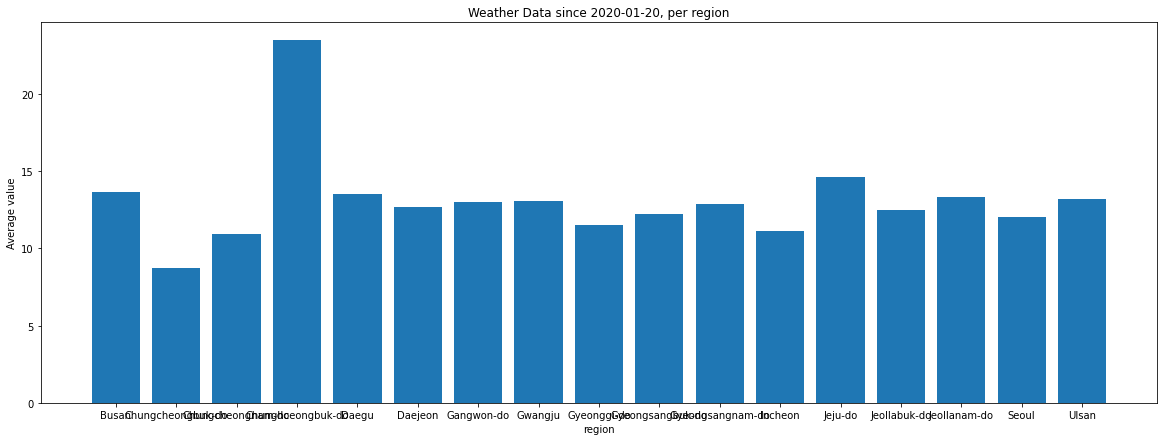

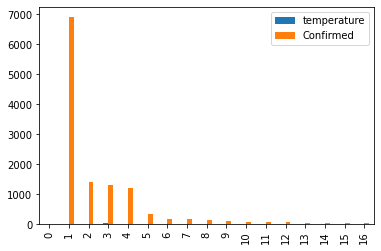

In [100]:
plt.figure(figsize=(20, 7))
plt.title('Weather Data since 2020-01-20, per region')
plt.xlabel('region')
plt.ylabel('Average value')
plt.bar(weather_temp.region, weather_temp.temperature)
plt.savefig("south_korea_figures/Weather_vs_Region")
weather_temp.plot.bar();
# plt.bar(weather_temp.iloc[0], weather_temp.iloc[1])
# plt.savefig("south_korea_figures/Weather_vs_Region")

In [74]:
region_cases = pd.read_csv("south_korea_dataset/TimeProvince.csv")
region_cases.head()

,date,time,province,confirmed,released,deceased
0,2020-01-20,16,Seoul,0,0,0
1,2020-01-20,16,Busan,0,0,0
2,2020-01-20,16,Daegu,0,0,0
3,2020-01-20,16,Incheon,1,0,0
4,2020-01-20,16,Gwangju,0,0,0


In [77]:
# Get the latest distribution of cumulative confirmed cases
loc_latest = region_cases[region_cases.date==region_cases.date.iloc[-1]]
del loc_latest['date']
del loc_latest['time']
loc_latest = loc_latest.iloc[:, :2]
loc_latest['proportion'] = round(loc_latest.confirmed / sum(loc_latest.confirmed) * 100, 2)
loc_latest = loc_latest.sort_values('proportion', ascending=False)
loc_latest.set_index(np.arange(1, len(loc_latest)+1), inplace=True)
loc_latest_all = loc_latest.copy()
loc_latest_all

,province,confirmed,proportion
1,Daegu,6906,57.19
2,Gyeongsangbuk-do,1389,11.50
3,Seoul,1312,10.86
4,Gyeonggi-do,1207,10.00
5,Incheon,341,2.82
6,Chungcheongnam-do,167,1.38
7,Busan,154,1.28
8,Gyeongsangnam-do,134,1.11
9,Daejeon,117,0.97
10,Gangwon-do,65,0.54


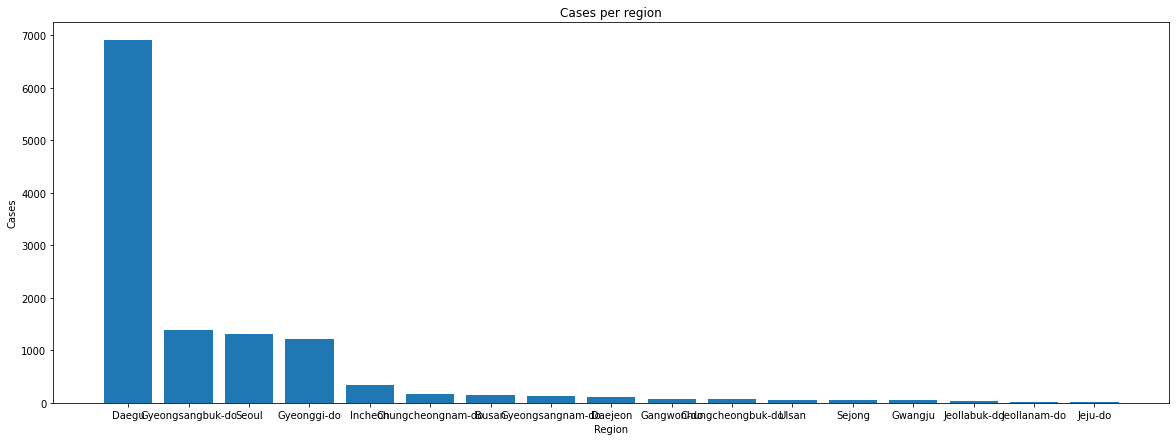

In [78]:
plt.figure(figsize=(20, 7))
plt.title('Cases per region')
plt.xlabel('Region')
plt.ylabel('Cases')
plt.bar(loc_latest.province, loc_latest.confirmed)
plt.savefig("south_korea_figures/Cases_vs_Region")

In [90]:
# add confirmed cases to bar graph
weather_temp.insert(2, "Confirmed", loc_latest.confirmed, True)
# del weather_temp["Confirmed"]

In [91]:
weather_temp.head()

,region,temperature,Confirmed
0,Busan,13.6259,NaN
1,Chungcheongbuk-do,8.73684,6906.0
2,Chungcheongnam-do,10.9605,1389.0
3,Chunghceongbuk-do,23.4759,1312.0
4,Daegu,13.5247,1207.0


<BarContainer object of 17 artists>

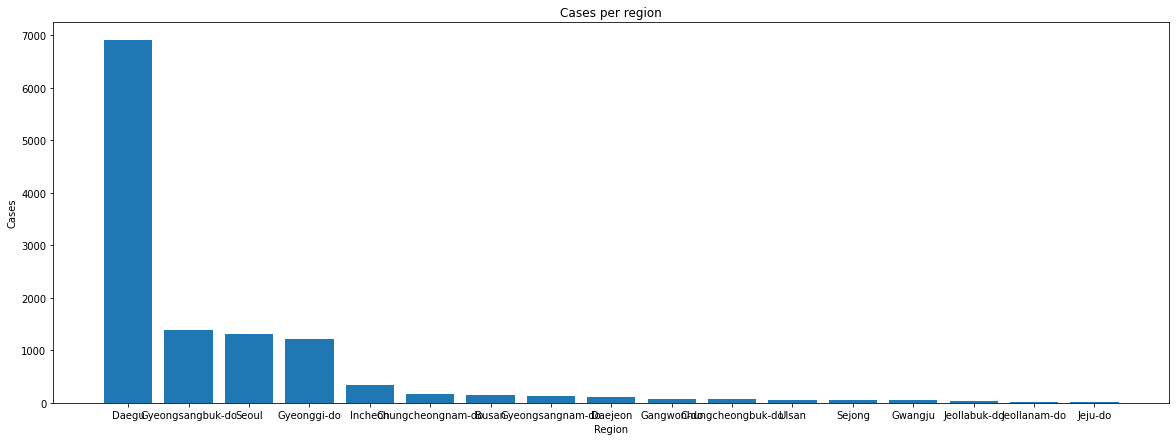

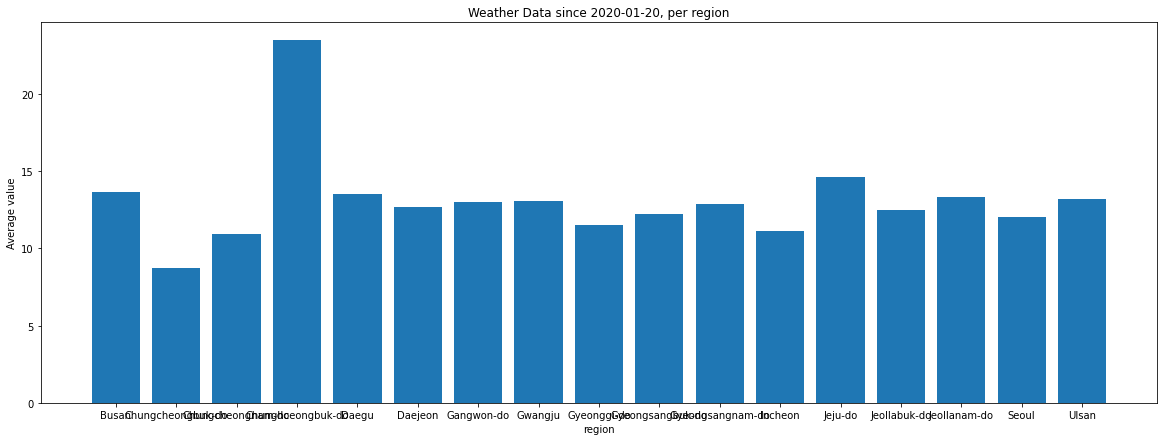

In [102]:
plt.figure(figsize=(20, 7))
plt.title('Cases per region')
plt.xlabel('Region')
plt.ylabel('Cases')
plt.bar(loc_latest.province, loc_latest.confirmed)

plt.figure(figsize=(20, 7))
plt.title('Weather Data since 2020-01-20, per region')
plt.xlabel('region')
plt.ylabel('Average value')
plt.bar(weather_temp.region, weather_temp.temperature)